In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("estonia.csv")

In [15]:
print(df.head())

   PassengerId  Country        Firstname  Lastname Sex  Age Category  Survived
0            1   Sweden      ARVID KALLE     AADLI   M   62        P         0
1            2  Estonia              LEA   AALISTE   F   22        C         0
2            3  Estonia             AIRI   AAVASTE   F   21        C         0
3            4   Sweden             JURI     AAVIK   M   53        C         0
4            5   Sweden  BRITTA ELISABET  AHLSTROM   F   55        P         0


In [16]:
print(df.columns)

Index(['PassengerId', 'Country', 'Firstname', 'Lastname', 'Sex', 'Age',
       'Category', 'Survived'],
      dtype='object')


In [17]:
contingency_sex = pd.crosstab(df['Survived'], df['Sex'])
print("Contingency Table for Survival by Sex:")
print(contingency_sex)

Contingency Table for Survival by Sex:
Sex         F    M
Survived          
0         459  393
1          27  110


In [18]:
contingency_age = pd.crosstab(df['Survived'], df['Age'])
print("Contingency Table for Survival by Age:")
print(contingency_age)

Contingency Table for Survival by Age:
Age       0   2   4   5   6   9   10  12  13  14  ...  73  74  75  76  77  78  \
Survived                                          ...                           
0          1   1   1   2   1   1   3   0   2   2  ...   7  15   5   5   2   4   
1          0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   

Age       80  81  82  87  
Survived                  
0          2   1   2   1  
1          0   0   0   0  

[2 rows x 78 columns]


In [19]:
contingency_category = pd.crosstab(df['Survived'], df['Category'])
print("Contingency Table for Survival by Class of Travel:")
print(contingency_category)

Contingency Table for Survival by Class of Travel:
Category    C    P
Survived          
0         154  698
1          39   98


In [20]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Survival Rate by Sex:")
print(survival_by_sex)

Survival Rate by Sex:
Sex
F    0.055556
M    0.218688
Name: Survived, dtype: float64


In [21]:
survival_by_age = df.groupby('Age')['Survived'].mean()
print("Survival Rate by Age:")
print(survival_by_age)

Survival Rate by Age:
Age
0     0.0
2     0.0
4     0.0
5     0.0
6     0.0
     ... 
78    0.0
80    0.0
81    0.0
82    0.0
87    0.0
Name: Survived, Length: 78, dtype: float64


In [24]:
survival_by_category = df.groupby('Category')['Survived'].mean()
print("Survival Rate by Category of Travel:")
print(survival_by_category)

Survival Rate by Category of Travel:
Category
C    0.202073
P    0.123116
Name: Survived, dtype: float64


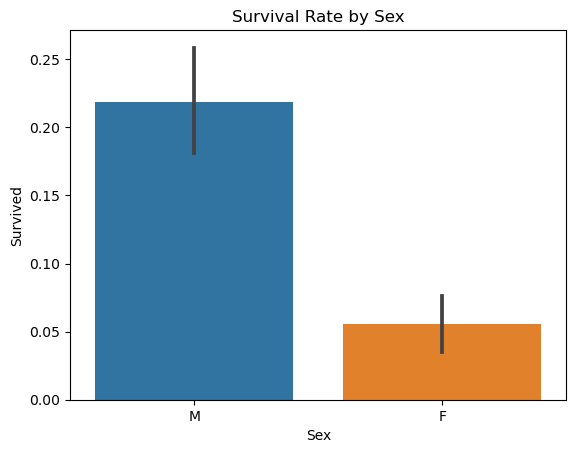

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

In [31]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 53.76288282218052, p-value: 2.2620606687414481e-13


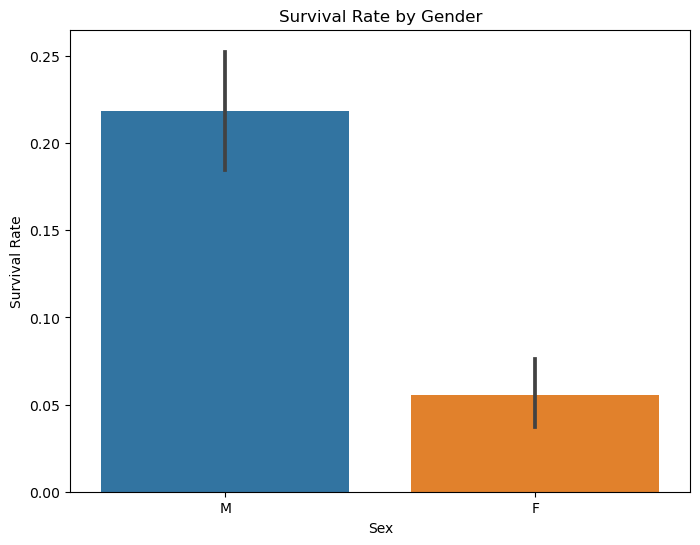

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to show survival rates by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, estimator=lambda x: sum(x) / len(x))

# Set the title and labels
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()

In [44]:
Survived_rate_by_Sex = df.groupby('Sex')['Survived'].mean() * 100
print(survived_rate_by_sex)

Sex
F     5.555556
M    21.868787
Name: Survived, dtype: float64


Text(0, 0.5, 'Survived Rate (%)')

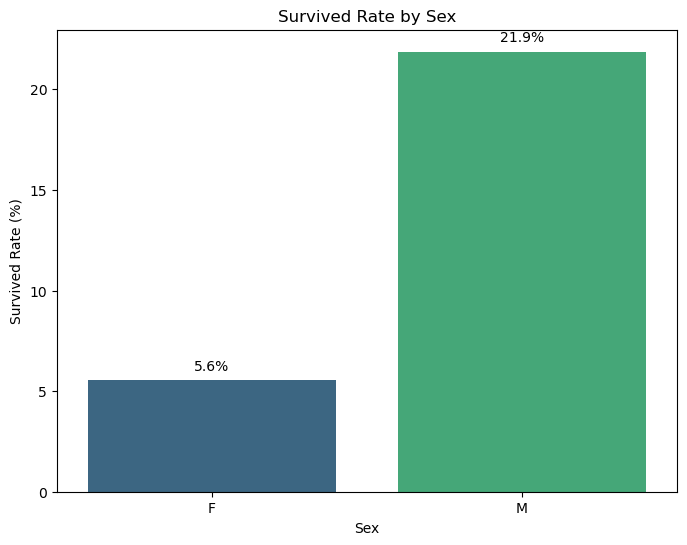

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_df = Survived_rate_by_Sex.reset_index()
plot_df.columns = ['Sex', 'Survived Rate']


plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sex', y='Survived Rate', data=plot_df, palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')


plt.title('Survived Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived Rate (%)')